# Guided Project: Data Analysis with Pandas

## Imported Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
from scipy import stats

## Step 1: Select & Import Data Set
- I went to Kaggle Data Sets and selected the [Kickstarter Projects](https://www.kaggle.com/kemical/kickstarter-projects/home) dataset. Kickstartes is one of the world's largest funding platform for creative projects and this dataset provides information of Kickstarter projects up to 2017.
- I downloaded the dataset into the your-code folder and imported it using pandas.

In [2]:
kickstarter = pd.read_csv('data-folder/ks-projects-201801.csv')
display(kickstarter.head()) 

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Step 2:  Data Cleaning
- I started to explore the dataset using the info command to get an idea of the data types and the nulls

In [3]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


- I changed the data types of the following columns 
    - ID to object
    - category to category
    - main_category to category
    - state to category
    - deadline to datetime
    - launched to datetime
- I used the dtypes command to verify the data types where changed

In [4]:
kickstarter['ID'] = kickstarter['ID'].astype('object')
kickstarter['category'] = kickstarter['category'].astype('category')
kickstarter['main_category'] = kickstarter['main_category'].astype('category')
kickstarter['state'] = kickstarter['state'].astype('category')
kickstarter['deadline'] = pd.to_datetime(kickstarter['deadline'])
kickstarter['launched'] = pd.to_datetime(kickstarter['launched'])

In [5]:
kickstarter.dtypes

ID                          object
name                        object
category                  category
main_category             category
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                     category
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

- I proceded to dropp the usd pledged column for two main reasons
   - The first was that it was missing values since but inreality they represented an insignificant portion of the data set
   - The second was that usd_pledged was the conversion to US dollars of the pledged column done by kickstarter, while the usd_pleadged_real column had the conversion by Fixer.io API which is in is the correct to use for analysis since it matched the usd_goal_real rate.

In [27]:
null_cols = kickstarter.isnull().sum()
drop_cols = list(null_cols[null_cols > 100].index)
kickstarter = kickstarter.drop(drop_cols, axis=1)

In [85]:
kickstarter.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

## Step 3: Preliminary Analysis

- I started the preliminary analysis using the describe command
- I as well created a boxplot and a histogram
    - I didn't find any of these anylists tools very usefull due to the type of data

In [28]:
kickstarter.describe()

,goal,pledged,backers,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


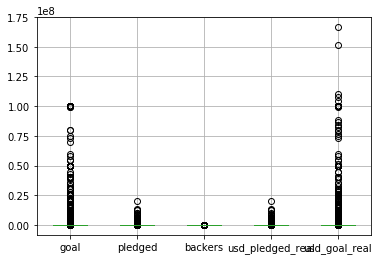

In [30]:
kickstarter.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1185237b8>,
      dtype=object)

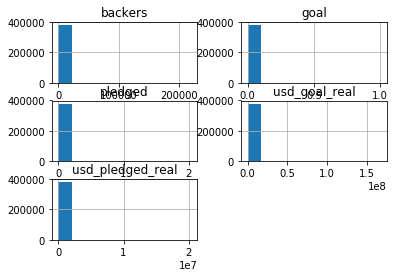

In [31]:
kickstarter.hist()

## Step 4: Correlation Analysis
- Because of the nature of the data, from the begining I was interested in finding correlations within the variables. 
- The first question I wanted to ask  was whether there was a relationship between the pledged amount, the goal amount, and the number of backers.
    - I therefore created a correlation matrix to figure out the correlations between these numerical variables.
    - From this matrix I discovered that the only strong correlation is between the number of backers and the pledged amount. 
        - I therefore proceeded to make a scatter plot with backers as the x axis and usd_pledged_read as the y axis to see the correlation more visually. 
        - From the scatter plot I was able to see that:
            - As the number of backers increased, so did the amount pledged
            - Most projects were concentrated in the lower regions of the axises, which means that most projects pledged smaller amounts of money and had lower amounts of backers.
            - There were are a couple outliers both in regards to amounts pledged and number of backers

In [34]:
kickstarter.corr()

,goal,pledged,backers,usd_pledged_real,usd_goal_real
goal,1.000000,0.007358,0.004012,0.005104,0.942692
pledged,0.007358,1.000000,0.717079,0.952843,0.005024
backers,0.004012,0.717079,1.000000,0.752539,0.004517
usd_pledged_real,0.005104,0.952843,0.752539,1.000000,0.005596
usd_goal_real,0.942692,0.005024,0.004517,0.005596,1.000000


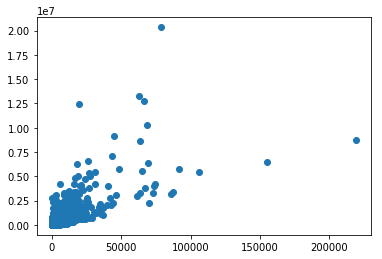

In [86]:
plt.scatter(x=kickstarter['backers'], y=kickstarter['usd_pledged_real'])

- I also wanted to undestand how many projects were in each main category
   - I therefore used the crosstab funtion with main_category as the index and the sum as the column, which I as well sorted. 
   - From this function I dicovered Film & Video and Music projects were the most popular project categories 

In [57]:
pd.crosstab(index=kickstarter.main_category, columns='sum').sort_values(by = 'sum', ascending=False)

col_0,sum
main_category,
Film & Video,63585
Music,51918
Publishing,39874
Games,35231
Technology,32569
Design,30070
Art,28153
Food,24602
Fashion,22816


- Now that I knew the most popular project categories, and that there were outliers as well, I wanted to understand how funding received was correlated or played a role with project categories 
    - I therefore created a pivot table to visually see the sum, minimum, mean, maximum and standard deviation of pledged amounts for each main category.
    - As I expected, the min amount for all categories was 0, since some projects don't receive any funding
    - Projects focused on Design received the highest funding on average, and projects on Crafts received the least
    - A project in Design received the highest funding overall

In [110]:
kickstarter.pivot_table(index=['main_category'],values=['usd_pledged_real'], aggfunc={'usd_pledged_real': [np.sum, np.mean, max, min, np.std]})

usd_pledged_real                                                
                           max          mean  min            std           sum
main_category                                                                 
Art                 1924018.00   3220.986968  0.0   21855.268913  9.068045e+07
Comics              1254120.08   6610.443828  0.0   24409.291132  7.151839e+07
Crafts               454717.53   1632.907282  0.0    8087.313906  1.438428e+07
Dance                146075.97   3452.946356  0.0    5768.896354  1.301070e+07
Design             20338986.27  24417.034698  0.0  214977.197138  7.342202e+08
Fashion             1851033.00   5712.450839  0.0   29930.334327  1.303353e+08
Film & Video        5764229.38   6157.978427  0.0   41398.668874  3.915551e+08
Food                1927217.00   5113.669716  0.0   31219.686607  1.258065e+08
Games              12393139.69  21041.903140  0.0  168530.082728  7.413273e+08
Journalism           215487.75   2615.702568  0.0   10450.694460  1.243767e+07
Music               1363037.00   3858.367608  0.0   13015.497669  2.003187e+08
Photography          793266.77   3571.909322  0.0   19273.424863  3.850161e+07
Publishing           866193.50   3349.951931  0.0   14816.605399  1.335760e+08
Technology          6225354.98  21151.171165  0.0  126726.153959  6.888725e+08
Theater              358548.01   4005.918099  0.0   10850.093645  4.371658e+07